# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
# basic libraries
import sys
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.style.use('seaborn-notebook')

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [3]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122136 entries, 0 to 2122135
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 97.1+ MB


In [5]:
# choose NYC to analyze
df_nyc = df[df.county=="New York City"]

In [6]:
df_nyc.head()

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0


In [7]:
df_nyc.tail()

,date,county,state,fips,cases,deaths
2107753,2022-01-12,New York City,New York,NaN,2005338,36224.0
2111005,2022-01-13,New York City,New York,NaN,2038543,36374.0
2114257,2022-01-14,New York City,New York,NaN,2058308,36509.0
2117508,2022-01-15,New York City,New York,NaN,2081362,36509.0
2120760,2022-01-16,New York City,New York,NaN,2109910,36509.0


In [8]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 416 to 2120760
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    687 non-null    object 
 1   county  687 non-null    object 
 2   state   687 non-null    object 
 3   fips    0 non-null      float64
 4   cases   687 non-null    int64  
 5   deaths  687 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 37.6+ KB


In [9]:
# drop useless & redundant columns
df_nyc.drop(["fips","county","state"], axis=1, inplace=True)

In [10]:
df_nyc.head()

,date,cases,deaths
416,2020-03-01,1,0.0
448,2020-03-02,1,0.0
482,2020-03-03,2,0.0
518,2020-03-04,2,0.0
565,2020-03-05,4,0.0


Text(0, 0.5, 'Total NYC Covid Deaths')

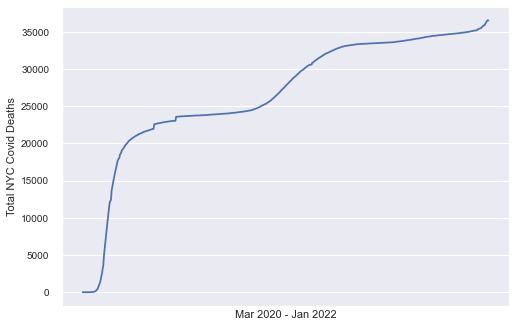

In [11]:
# plot total deaths from Mar 2021 to Jan 2022
plt.plot(df_nyc.date, df_nyc.deaths)
plt.xticks([],[])
plt.xlabel("Mar 2020 - Jan 2022")
plt.ylabel("Total NYC Covid Deaths")

Text(0, 0.5, 'Total NYC Covid Cases')

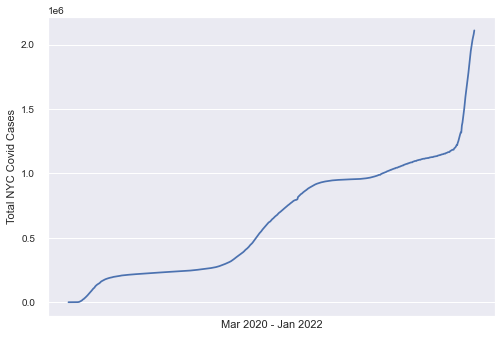

In [12]:
# plot total cases from Mar 2021 to Jan 2022
plt.plot(df_nyc.date, df_nyc.cases)
plt.xticks([],[])
plt.xlabel("Mar 2020 - Jan 2022")
plt.ylabel("Total NYC Covid Cases")

In [13]:
# calculate daily cases
nyc_daily_cases = 2109910/687
nyc_daily_cases

3071.193595342067

In [14]:
# calculate daily death
nyc_daily_deaths = 36509/687
nyc_daily_deaths

53.14264919941776

# Task4: Understand NYC covid 19 data in last 28 days

In [15]:
# slice data from the last 28 days
df_nyc_28days = df_nyc.iloc[-28:,:]
df_nyc_28days.head()

,date,cases,deaths
2032988,2021-12-20,1249755,35067.0
2036238,2021-12-21,1267713,35100.0
2039488,2021-12-22,1284470,35126.0
2042737,2021-12-23,1302298,35151.0
2045987,2021-12-24,1317511,35151.0


In [16]:
df_nyc_28days.tail()

,date,cases,deaths
2107753,2022-01-12,2005338,36224.0
2111005,2022-01-13,2038543,36374.0
2114257,2022-01-14,2058308,36509.0
2117508,2022-01-15,2081362,36509.0
2120760,2022-01-16,2109910,36509.0


In [17]:
#df_nyc_28days.to_csv("df_nyc_28days.csv")

Text(0, 0.5, 'Total NYC Covid Cases')

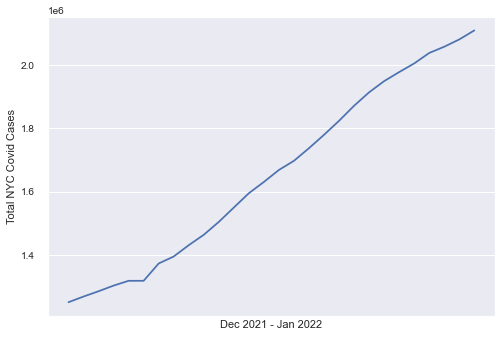

In [18]:
# plot total cases in nyc from the last 28 days
plt.plot(df_nyc_28days.date, df_nyc_28days.cases)
plt.xticks([],[])
plt.xlabel("Dec 2021 - Jan 2022")
plt.ylabel("Total NYC Covid Cases")

Text(0, 0.5, 'Total NYC Covid Deaths')

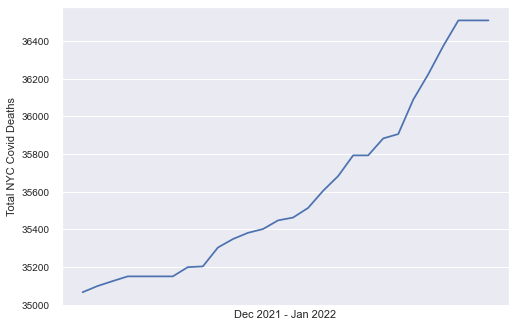

In [19]:
# plot total deaths in nyc from the last 28 days
plt.plot(df_nyc_28days.date, df_nyc_28days.deaths)
plt.xticks([],[])
plt.xlabel("Dec 2021 - Jan 2022")
plt.ylabel("Total NYC Covid Deaths")

In [20]:
# slice data from the last 29 days to calculate daily data increment
df_nyc_29days = df_nyc.iloc[-29:-1,:]

In [21]:
# calculate daily data increment
df_nyc_28days['daily death increment'] = np.array(df_nyc_28days.deaths.tolist()) - np.array(df_nyc_29days.deaths.tolist())
df_nyc_28days['daily case increment'] = np.array(df_nyc_28days.cases.tolist()) - np.array(df_nyc_29days.cases.tolist())

In [22]:
df_nyc_28days.head()

,date,cases,deaths,daily death increment,daily case increment
2032988,2021-12-20,1249755,35067.0,1.0,12293
2036238,2021-12-21,1267713,35100.0,33.0,17958
2039488,2021-12-22,1284470,35126.0,26.0,16757
2042737,2021-12-23,1302298,35151.0,25.0,17828
2045987,2021-12-24,1317511,35151.0,0.0,15213


Text(0, 0.5, 'NYC Daily Covid Deaths')

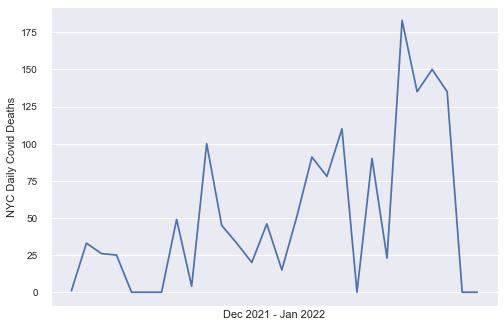

In [23]:
# plot daily death increment
plt.plot(df_nyc_28days.date, df_nyc_28days["daily death increment"])
plt.xticks([],[])
plt.xlabel("Dec 2021 - Jan 2022")
plt.ylabel("NYC Daily Covid Deaths")

Text(0, 0.5, 'NYC Daily Covid Cases')

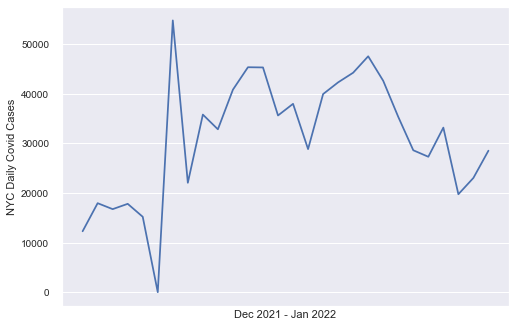

In [24]:
# plot daily case increment
plt.plot(df_nyc_28days.date, df_nyc_28days["daily case increment"])
plt.xticks([],[])
plt.xlabel("Dec 2021 - Jan 2022")
plt.ylabel("NYC Daily Covid Cases")

# Comparing Covid 19 data with different states

In [25]:
# compare total death
df_death_byState = df.groupby("state").agg({'deaths':"max"})

In [26]:
# state with higher total deaths
df_death_byState.sort_values("deaths",inplace=False,ascending=False).head()

,deaths
state,
New York,36509.0
California,28059.0
Arizona,14179.0
Illinois,13058.0
Florida,11799.0


In [27]:
# state with lower total deaths
df_death_byState.sort_values("deaths",inplace=False,ascending=False).tail()

,deaths
state,
Wyoming,246.0
Vermont,140.0
Virgin Islands,48.0
Northern Mariana Islands,18.0
American Samoa,0.0


In [28]:
# compare total cases
df_case_byState = df.groupby("state").agg({'cases':"max"})

In [29]:
# state with higher total cases
df_case_byState.sort_values("cases",inplace=False,ascending=False).head()

,cases
state,
California,2258206
New York,2109910
Florida,1051508
Arizona,1025184
Illinois,986858


In [30]:
# state with lower total cases
df_case_byState.sort_values("cases",inplace=False,ascending=False).tail()

,cases
state,
Vermont,20969
Wyoming,20717
Virgin Islands,6442
Northern Mariana Islands,3507
American Samoa,1


In [31]:
# compare death to case ratio by state
d2c_ratio = np.round((100*np.array(df.groupby("state").agg({'deaths':"max"}).deaths.tolist())/np.array(df.groupby("state").agg({'cases':"max"}).cases.tolist())),2)

In [32]:
# state with higher death to case ratio
df_d2c = pd.DataFrame({"state":df_case_byState.index, "death to case ratio(%)":d2c_ratio})
df_d2c.sort_values("death to case ratio(%)",inplace=False,ascending=False).head()

,state,death to case ratio(%)
42,Puerto Rico,6.46
24,Michigan,2.02
34,New York,1.73
53,West Virginia,1.66
32,New Jersey,1.65


In [33]:
# state with lower death to case ratio
df_d2c.sort_values("death to case ratio(%)",inplace=False,ascending=False).tail()

,state,death to case ratio(%)
36,North Dakota,0.62
1,Alaska,0.57
37,Northern Mariana Islands,0.51
48,Utah,0.50
2,American Samoa,0.00


In [34]:
# calculate national average death to case ratio
np.round(np.mean(df_d2c["death to case ratio(%)"]),2)

1.21

# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --California has the highest cases while New York has the highest deaths
2.   Conclusion 2
     --Puerto Rico has the highest death to case ratio (6.46%), which is much higher than national average (1.21%)
3.   Conclusion 3
     --In the last 28 days, NYC's daily incremental cases and deaths are growing faster than before
4.   Conclusion 4
     --American Samoa State has only 1 case and 0 death